In [7]:
# Structuring Element
# 커널과 같은 역할을 하는 Structuring Element는 cv2.getStructuringElement를 이용해 구할 수 있다.

# cv2.getStructuringElement(shape,ksize[,anchor[) -> retval
 
# 1. shape : 커널의 모양 (타입 : cv::MorphShapes)
#  - cv2.MORPH_CROSS : 십자가형
#  - cv2.MORPH_ELLIPSE : 타원형
#  - cv2.MORPH_RECT : 직사각형
# 2. ksize : 커널의 크기
# 3. anchor : 커널의 기준점. default(-1,-1)은 중심을 기준점으로 한다. 이 값은 십자가형의 커널을 사용할 때만 영향이 있다.

import cv2
import numpy as np

cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5),anchor = (1,1))
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

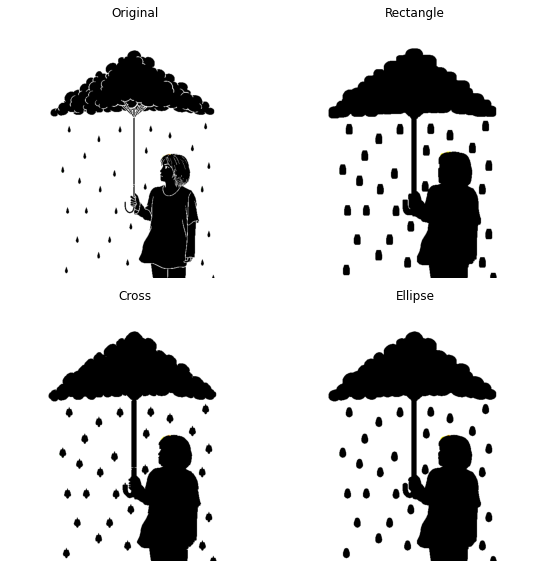

In [21]:
# 1. Erosion
# 각 픽셀에 Structuring Element를 적용하여 하나라도 0이 있으면 중심 픽셀을 제가한다.
# 작은 오브젝트를 제거하는데에 효과가 있다.
# 아래 결과를 보면 검은색 영역이 더 흰색 영역을 침식한다.
# cv2.erode(src,kernel[,dst[,anchor[,iterations[,borderType[,borderValue]]]]])
# kernel : cv2.getStructuringElement()로 생성한 Structuring Element
# anchor : Structuring Element 안에서 사용할 기준점
# iterations : 침식 반복 횟수

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cartoon1.png')
ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

kernel = []
kernel.append(cv2.getStructuringElement(cv2.MORPH_RECT,(11,11)))
kernel.append(cv2.getStructuringElement(cv2.MORPH_CROSS,(11,11)))
kernel.append(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)))
titles = ['Rectangle','Cross','Ellipse']

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

for i in range(3):
    img_erosion = cv2.erode(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(img_erosion)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.savefig('erosion.png')
plt.show()

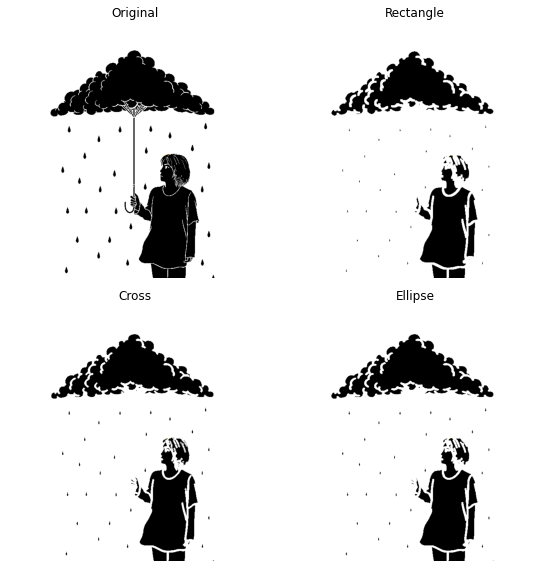

In [20]:
# 2. Dilation
# Erosion과 반대로 하나라도 1이면 픽셀을 1로 만든다.
# Dilation을 적용하면 흰색 영역이 반대로 더 넓어진다.
# 경계가 부드러워지고 구멍이 메꿔진다.
# cv2.dilate(src,kernel,[,dst[,anchor[,iterations[,borderType[,borderValue]]]]])

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cartoon1.png')
ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

kernel = []
ksize = 5
kernel.append(cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize)))
kernel.append(cv2.getStructuringElement(cv2.MORPH_CROSS,(ksize,ksize)))
kernel.append(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize)))
titles = ['Rectangle','Cross','Ellipse']

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

for i in range(3):
    img_dilation = cv2.dilate(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(img_dilation)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.savefig('dilation.png')
plt.show()

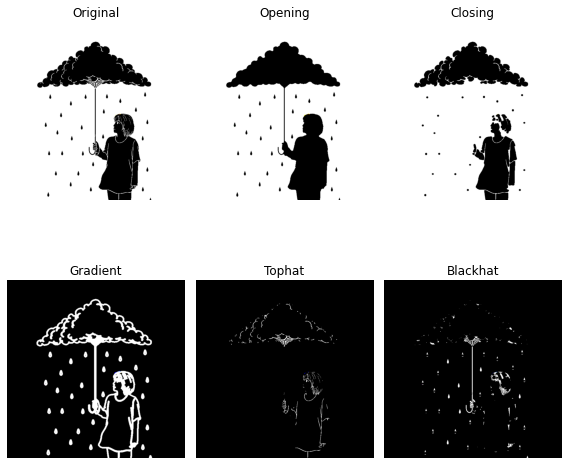

In [28]:
# 3. Opening & Closing
# Opening : 이미지에 Erosion 적용 후 Dilation 적용. 점 잡음이나 작은 물체 제거
# Closing : 이미지에 Dilation 적용 후 Erosion 적용. 영역끼리 붙어 전체 윤곽 파악
# cv2.morphologyEx(src,op,kernel,[,dst[,anchor[,iterations[,borderType[,borderValue]]]]])
# op : Morphological 연산의 종류 (타입 : cv::MorphTypes)
# 1. cv2.MORPH_OPEN : cv2.dilate(cv2.erode(src))
# 2. cv2.MORPH_CLOSE : cv2.erode(cv2.dilate(src))
# 3. cv2.MORPH_GRADIENT : cv2.dilate(src) - src.erode(src)
# 4. cv2.MORPH_TOPHAT : src - opening
# 5. cv2.MORPH_BLACKHAT : closing - src

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cartoon1.png')
ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
img_opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
img_closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
img_gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
img_tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
img_blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)

titles = ['Original','Opening','Closing','Gradient','Tophat','Blackhat']
images = [img,img_opening,img_closing,img_gradient,img_tophat,img_blackhat]

plt.figure(figsize=(8,8))

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.savefig('morphology.png')
plt.show()